In [1]:
import os
# os.environ['CXX'] = '/usr/bin/g++'
# os.environ['CXXFLAGS'] = '-I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/c++/v1'

#os.environ['CXXFLAGS'] = '-I/Library/Developer/CommandLineTools/usr/lib/clang/16/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include -I/Library/Developer/CommandLineTools/usr/include'
os.environ["PATH"] = "/Users/deepprakashravi/miniforge3/envs/gempy_dino/bin:" + os.environ["PATH"]
os.environ["PKG_CONFIG_PATH"] = "/Users/deepprakashravi/miniforge3/envs/gempy_dino/lib/pkgconfig:" + os.environ.get("PKG_CONFIG_PATH", "")
os.environ["LD_LIBRARY_PATH"] = "/Users/deepprakashravi/miniforge3/envs/gempy_dino/lib:" + os.environ.get("LD_LIBRARY_PATH", "")

# Verify if paths are set correctly
print("PATH:", os.environ["PATH"])
print("PKG_CONFIG_PATH:", os.environ["PKG_CONFIG_PATH"])
print("LD_LIBRARY_PATH:", os.environ["LD_LIBRARY_PATH"])

PATH: /Users/deepprakashravi/miniforge3/envs/gempy_dino/bin:/Users/deepprakashravi/miniforge3/envs/gempy_dino/bin:/Users/deepprakashravi/miniforge3/bin:/Users/deepprakashravi/miniforge3/condabin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/Library/TeX/texbin:/usr/local/share/dotnet:~/.dotnet/tools:/usr/local/munki:/usr/local/munkireport:/Users/deepprakashravi/Library/Application Support/JetBrains/Toolbox/scripts:/Users/deepprakashravi/.local/bin:/Users/deepprakashravi/.local/bin:/Users/deepprakashravi/miniforge3/bin:/Users/deepprakashravi/miniforge3/condabin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cry

In [2]:
import dolfin as dl
import ufl

import sys
import os
sys.path.append( os.environ.get('HIPPYLIB_BASE_DIR', "../") )
from hippylib import *

import logging
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
dl.set_log_active(False)

/Users/deepprakashravi/miniforge3/envs/gempy_dino/lib/python3.10/site-packages/setuptools/_distutils/cmd.py:79: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/Users/deepprakashravi/miniforge3/envs/gempy_dino/lib/python3.10/site-packages/setuptools/_distutils/cmd.py:79: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
    

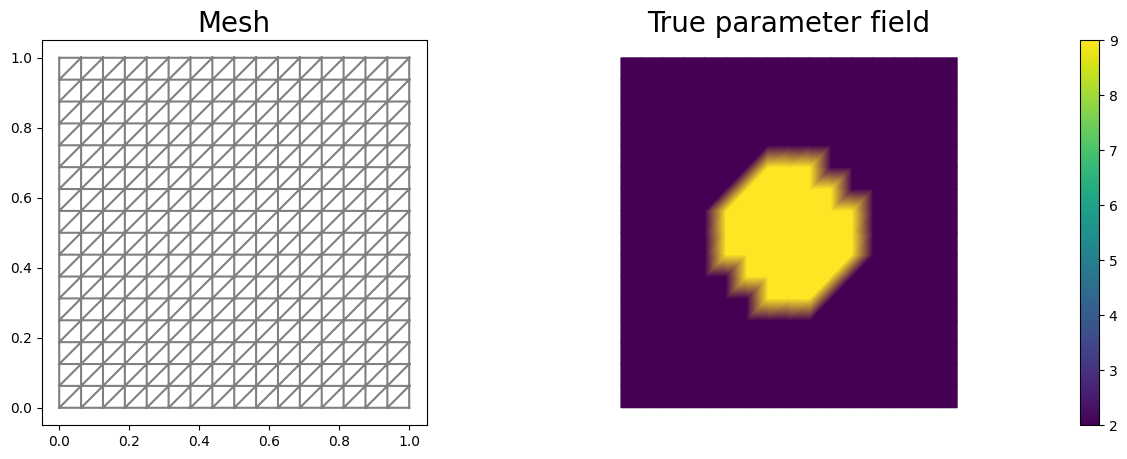

In [3]:
# create mesh and define function spaces
nx = 16
ny = 16
mesh = dl.UnitSquareMesh(nx, ny) # create a grid of unit square 
Vm = dl.FunctionSpace(mesh, 'Lagrange', 1)  # 1 is piecewise linear
Vu = dl.FunctionSpace(mesh, 'Lagrange', 1) # 2 is piecewise quadratic

# The true and inverted parameter
mtrue_expression = dl.Expression(
    '2 + 7*(std::pow(std::pow(x[0] - 0.5,2) + std::pow(x[1] - 0.5,2),0.5) < 0.2)',
    degree=5)
mtrue = dl.interpolate(mtrue_expression,Vm) 

# define function for state and adjoint
u = dl.Function(Vu)
p = dl.Function(Vu)

# define Trial and Test Functions
u_trial, p_trial, m_trial = dl.TrialFunction(Vu), dl.TrialFunction(Vu), dl.TrialFunction(Vm)
u_test, p_test, m_test = dl.TestFunction(Vu), dl.TestFunction(Vu), dl.TestFunction(Vm)


# plot
plt.figure(figsize=(15,5))
nb.plot(mesh,subplot_loc=121, mytitle="Mesh", show_axis='on')
nb.plot(mtrue,subplot_loc=122, mytitle="True parameter field")
plt.show()

In [4]:
mesh_nodes = mesh.coordinates()
print(mesh_nodes)
np.save("nodes.npy", mesh_nodes)


[[0.     0.    ]
 [0.0625 0.    ]
 [0.125  0.    ]
 [0.1875 0.    ]
 [0.25   0.    ]
 [0.3125 0.    ]
 [0.375  0.    ]
 [0.4375 0.    ]
 [0.5    0.    ]
 [0.5625 0.    ]
 [0.625  0.    ]
 [0.6875 0.    ]
 [0.75   0.    ]
 [0.8125 0.    ]
 [0.875  0.    ]
 [0.9375 0.    ]
 [1.     0.    ]
 [0.     0.0625]
 [0.0625 0.0625]
 [0.125  0.0625]
 [0.1875 0.0625]
 [0.25   0.0625]
 [0.3125 0.0625]
 [0.375  0.0625]
 [0.4375 0.0625]
 [0.5    0.0625]
 [0.5625 0.0625]
 [0.625  0.0625]
 [0.6875 0.0625]
 [0.75   0.0625]
 [0.8125 0.0625]
 [0.875  0.0625]
 [0.9375 0.0625]
 [1.     0.0625]
 [0.     0.125 ]
 [0.0625 0.125 ]
 [0.125  0.125 ]
 [0.1875 0.125 ]
 [0.25   0.125 ]
 [0.3125 0.125 ]
 [0.375  0.125 ]
 [0.4375 0.125 ]
 [0.5    0.125 ]
 [0.5625 0.125 ]
 [0.625  0.125 ]
 [0.6875 0.125 ]
 [0.75   0.125 ]
 [0.8125 0.125 ]
 [0.875  0.125 ]
 [0.9375 0.125 ]
 [1.     0.125 ]
 [0.     0.1875]
 [0.0625 0.1875]
 [0.125  0.1875]
 [0.1875 0.1875]
 [0.25   0.1875]
 [0.3125 0.1875]
 [0.375  0.1875]
 [0.4375 0.187

In [5]:
class TopBoundary(dl.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[1] - 1) < dl.DOLFIN_EPS

class BottomBoundary(dl.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[1]) < dl.DOLFIN_EPS

class LeftBoundary(dl.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[0]) < dl.DOLFIN_EPS

class RightBoundary(dl.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[0] - 1) < dl.DOLFIN_EPS

boundary_parts = dl.MeshFunction("size_t", mesh, mesh.topology().dim()-1)
#boundary_parts = FacetFunction("size_t", mesh)
boundary_parts.set_all(0)

Gamma_top = TopBoundary()
Gamma_top.mark(boundary_parts, 1)
Gamma_bottom = BottomBoundary()
Gamma_bottom.mark(boundary_parts, 2)
Gamma_left = LeftBoundary()
Gamma_left.mark(boundary_parts, 3)
Gamma_right = RightBoundary()
Gamma_right.mark(boundary_parts, 4)

u_T = dl.Constant(0.)
u_B = dl.Constant(30.)


f = dl.Expression('(4.0*pi*pi+pi*pi/4.0)*(sin(2*pi*x[0])*sin((pi/2.0)*x[1]))', degree=5)

bc_state = [dl.DirichletBC(Vu, u_T, boundary_parts, 1),
       dl.DirichletBC(Vu, u_B, boundary_parts, 2)]
bc_adj = [dl.DirichletBC(Vu, dl.Constant(0.), boundary_parts, 1),
       dl.DirichletBC(Vu, dl.Constant(0.), boundary_parts, 2)]

ds = dl.Measure("ds", subdomain_data=boundary_parts)

In [6]:
# Define a custom thermal conductivity function
class ThermalConductivity(dl.UserExpression):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)  # Initialize UserExpression properly

    def eval(self, value, x):
        if x[1] < 0.3:  # Bottom layer
            value[0] = 1.0
        elif x[1] < 0.5:  # Middle layer
            value[0] = 2.0
        else:  # Top layer
            value[0] = 3.0

    def value_shape(self):
        return ()  # Scalar function, so empty shape
# Create an instance of the thermal conductivity function
k = ThermalConductivity(degree=0)  # Piecewise constant

# Interpolate onto the function space
k_func = dl.interpolate(k, Vu)


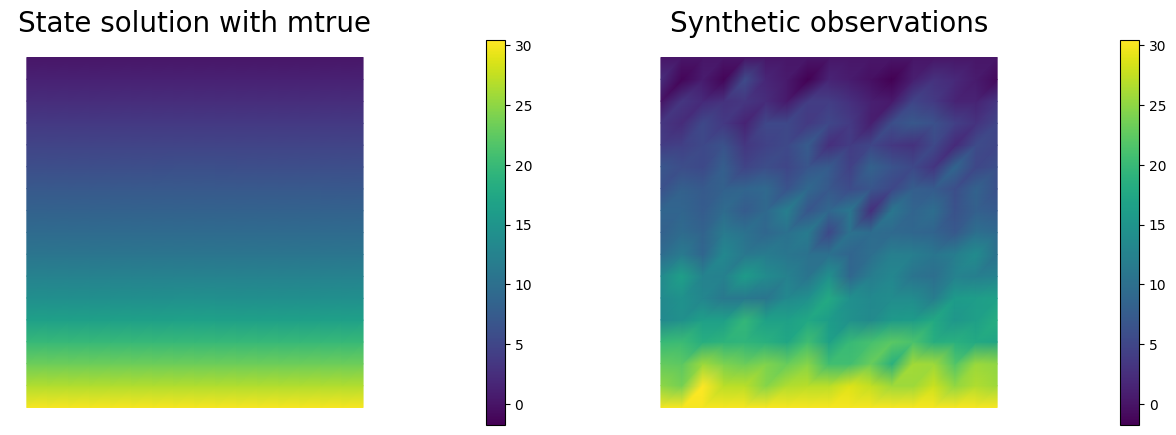

In [7]:
# noise level
noise_level = 0.05
# Set a fixed seed for reproducibility
np.random.seed(42)
# weak form for setting up the synthetic observations
a_goal = dl.inner(k_func * dl.grad(u_trial), dl.grad(u_test)) * dl.dx
L_goal =  mtrue * u_test * dl.dx

# solve the forward/state problem to generate synthetic observations
goal_A, goal_b = dl.assemble_system(a_goal, L_goal, bc_state)

utrue = dl.Function(Vu)
dl.solve(goal_A, utrue.vector(), goal_b)

ud = dl.Function(Vu)
ud.assign(utrue)

from hippylib.utils.random import Random

# Create a Random object with a specific seed
prng = Random(seed=123)  # You can use any integer as the seed

# perturb state solution and create synthetic measurements ud
# ud = u + ||u||/SNR * random.normal
MAX = ud.vector().norm("linf")
noise = dl.Vector()
goal_A.init_vector(noise,1)
#parRandom.normal(noise_level * MAX, noise)
prng.normal(noise_level * MAX, noise)
bc_adj[0].apply(noise)
bc_adj[1].apply(noise)

ud.vector().axpy(1., noise)

# plot
nb.multi1_plot([utrue, ud], ["State solution with mtrue", "Synthetic observations"])
plt.show()

In [8]:
u_obs = ud.vector().get_local() 
print(u_obs.shape)

# Generate an array of (x, y) points to evaluate

print(mesh_nodes.shape)
u_at_coords = np.array([ud(point) for point in mesh_nodes])

print(u_at_coords)

(289,)
(289, 2)
[ 3.00000000e+01  3.00000000e+01  3.00000000e+01  3.00000000e+01
  3.00000000e+01  3.00000000e+01  3.00000000e+01  3.00000000e+01
  3.00000000e+01  3.00000000e+01  3.00000000e+01  3.00000000e+01
  3.00000000e+01  3.00000000e+01  3.00000000e+01  3.00000000e+01
  3.00000000e+01  2.49209096e+01  2.37253187e+01  3.04522199e+01
  2.70748724e+01  2.69717017e+01  2.45665717e+01  2.66439545e+01
  2.70326307e+01  2.69731020e+01  2.87822628e+01  2.75478163e+01
  2.56907379e+01  2.57646787e+01  2.78400822e+01  2.50667627e+01
  2.65588766e+01  2.57779636e+01  2.28599760e+01  2.23385927e+01
  2.57052307e+01  2.40908857e+01  2.31753620e+01  2.41833510e+01
  2.29845652e+01  2.45776032e+01  2.05332454e+01  2.06438792e+01
  2.31147389e+01  1.86674109e+01  2.59559378e+01  2.57926533e+01
  2.16635448e+01  2.56480504e+01  2.49255046e+01  1.99446502e+01
  2.01431653e+01  1.84225366e+01  1.91003973e+01  1.93319056e+01
  1.87275956e+01  1.72730812e+01  2.05483830e+01  1.66470550e+01
  1.99608

In [9]:
# weak for for setting up the misfit and regularization compoment of the cost
W_equ   = dl.inner(u_trial, u_test) * dl.dx

W = dl.assemble(W_equ)

# refine cost function
def cost(u, ud, W):
    diff = u.vector() - ud.vector()
    misfit = 0.5 * diff.inner(W * diff)
    return misfit

In [10]:
# weak form for setting up the state equation
a_state = dl.inner( k_func * dl.grad(u_trial), dl.grad(u_test)) * dl.dx
L_state = mtrue * u_test * dl.dx

# weak form for setting up the adjoint equation
a_adj = dl.inner(k_func *dl.grad(p_trial), dl.grad(p_test)) * dl.dx
# L_adj = -dl.inner(u - ud, p_test) * dl.dx
L_adj = - p_test * dl.dx


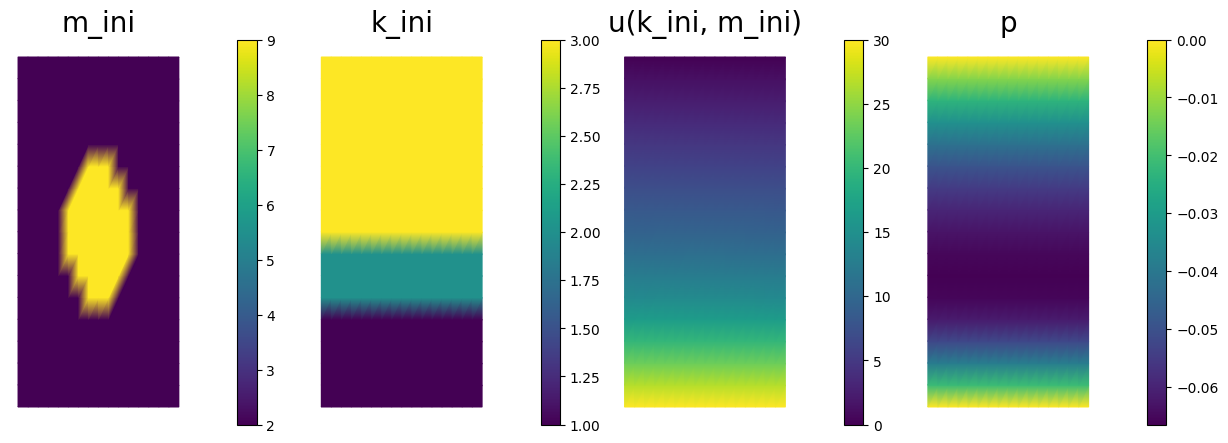

In [11]:
# solve state equation
state_A, state_b = dl.assemble_system (a_state, L_state, bc_state)
dl.solve (state_A, u.vector(), state_b)

#solve adjoint equation
adj_A, adj_b = dl.assemble_system (a_adj, L_adj, bc_adj)
dl.solve (adj_A, p.vector(), adj_b)

# evaluate cost
misfit_old = cost(u, ud, W)

# plot
plt.figure(figsize=(15,5))
nb.plot(mtrue,subplot_loc=141, mytitle="m_ini", vmin=mtrue.vector().min(), vmax=mtrue.vector().max())
nb.plot(k_func,subplot_loc=142, mytitle="k_ini", vmin=k_func.vector().min(), vmax=k_func.vector().max())
nb.plot(u,subplot_loc=143, mytitle="u(k_ini, m_ini)")
nb.plot(p,subplot_loc=144, mytitle="p")
plt.show()

In [12]:
# Sensitivity 
J_k_i = dl.assemble(dl.inner(dl.grad(u), dl.grad(p)) * dl.dx)
J_m_i = dl.assemble(- p * dl.dx)

In [13]:
J_k_i_ = dl.project(dl.inner(dl.grad(u), dl.grad(p)), Vu)
J_m_i_ = dl.project(- p, Vu)

In [14]:
J_k_i_.vector().get_local()

array([18.58181253, 17.19572557, 19.07664037, 13.18981479, 16.92737726,
       19.08328141,  9.95562579, 13.26491213, 16.99483053, 19.07023853,
        5.73170949, 10.32796434, 13.20025556, 17.01052561, 19.07395074,
        0.47548643,  5.20889416, 10.46578432, 13.2024319 , 17.00986466,
       19.07284024,  0.02562202,  0.72405915,  5.15215688, 10.45929161,
       13.20391761, 17.00659759, 19.06893251, -0.80053827, -0.0464818 ,
        0.67615822,  5.1411721 , 10.45440507, 13.19858921, 17.0021582 ,
       19.06497386, -0.95827288, -0.77068717, -0.03508334,  0.67534186,
        5.1293619 , 10.44634932, 13.19254475, 16.99832597, 19.06312994,
       -1.09975609, -0.8998791 , -0.76503986, -0.03894006,  0.67322258,
        5.12241639, 10.43727339, 13.18721242, 16.99722277, 19.06475943,
       -1.57994624, -1.14782551, -0.9024405 , -0.7586289 , -0.03902432,
        0.67121747,  5.11531194, 10.42894632, 13.18493176, 16.99984842,
       19.07026143, -1.95416989, -1.57092086, -1.14465904, -0.90

In [15]:
J_m_i_.vector().get_local()

array([ 5.91065929e-19,  2.12953944e-02,  8.08546375e-19,  3.86804732e-02,
        2.12974272e-02,  1.43141799e-18,  5.21451431e-02,  3.86875526e-02,
        2.13005118e-02,  2.22960785e-18,  6.16526087e-02,  5.21706202e-02,
        3.86954399e-02,  2.13029300e-02, -1.31436370e-18,  6.56714448e-02,
        6.17566519e-02,  5.21868834e-02,  3.87005617e-02,  2.13043964e-02,
        2.54990634e-18,  6.65188686e-02,  6.56052676e-02,  6.17808590e-02,
        5.21943644e-02,  3.87032625e-02,  2.13051433e-02, -6.22933535e-18,
        6.54618941e-02,  6.64945052e-02,  6.55871987e-02,  6.17863943e-02,
        5.21973682e-02,  3.87044738e-02,  2.13054530e-02, -1.42506923e-18,
        6.29551404e-02,  6.54224079e-02,  6.64783518e-02,  6.55805590e-02,
        6.17872434e-02,  5.21983523e-02,  3.87048871e-02,  2.13055314e-02,
       -2.18164294e-18,  5.96564626e-02,  6.29799683e-02,  6.54086084e-02,
        6.64699698e-02,  6.55772877e-02,  6.17868573e-02,  5.21984599e-02,
        3.87049117e-02,  

In [16]:
J_m_i_.vector().get_local().shape, mesh_nodes.shape[0]

((289,), 289)

In [17]:
J_k, J_m = J_k_i * np.ones(mesh_nodes.shape[0]),J_m_i * np.ones(mesh_nodes.shape[0])

In [18]:
J_k_ , J_m_ = J_k_i_.vector().get_local() * np.ones(mesh_nodes.shape[0]),J_m_i_.vector().get_local() * np.ones(mesh_nodes.shape[0])

In [19]:
grad_J = np.concatenate([J_k, J_m])

In [20]:
grad_J_ = np.concatenate([J_k_, J_m_])

In [21]:
grad_J

array([2.23680208, 2.23680208, 2.23680208, 2.23680208, 2.23680208,
       2.23680208, 2.23680208, 2.23680208, 2.23680208, 2.23680208,
       2.23680208, 2.23680208, 2.23680208, 2.23680208, 2.23680208,
       2.23680208, 2.23680208, 2.23680208, 2.23680208, 2.23680208,
       2.23680208, 2.23680208, 2.23680208, 2.23680208, 2.23680208,
       2.23680208, 2.23680208, 2.23680208, 2.23680208, 2.23680208,
       2.23680208, 2.23680208, 2.23680208, 2.23680208, 2.23680208,
       2.23680208, 2.23680208, 2.23680208, 2.23680208, 2.23680208,
       2.23680208, 2.23680208, 2.23680208, 2.23680208, 2.23680208,
       2.23680208, 2.23680208, 2.23680208, 2.23680208, 2.23680208,
       2.23680208, 2.23680208, 2.23680208, 2.23680208, 2.23680208,
       2.23680208, 2.23680208, 2.23680208, 2.23680208, 2.23680208,
       2.23680208, 2.23680208, 2.23680208, 2.23680208, 2.23680208,
       2.23680208, 2.23680208, 2.23680208, 2.23680208, 2.23680208,
       2.23680208, 2.23680208, 2.23680208, 2.23680208, 2.23680

In [22]:
grad_J_

array([ 1.85818125e+01,  1.71957256e+01,  1.90766404e+01,  1.31898148e+01,
        1.69273773e+01,  1.90832814e+01,  9.95562579e+00,  1.32649121e+01,
        1.69948305e+01,  1.90702385e+01,  5.73170949e+00,  1.03279643e+01,
        1.32002556e+01,  1.70105256e+01,  1.90739507e+01,  4.75486435e-01,
        5.20889416e+00,  1.04657843e+01,  1.32024319e+01,  1.70098647e+01,
        1.90728402e+01,  2.56220233e-02,  7.24059148e-01,  5.15215688e+00,
        1.04592916e+01,  1.32039176e+01,  1.70065976e+01,  1.90689325e+01,
       -8.00538266e-01, -4.64818007e-02,  6.76158215e-01,  5.14117210e+00,
        1.04544051e+01,  1.31985892e+01,  1.70021582e+01,  1.90649739e+01,
       -9.58272882e-01, -7.70687167e-01, -3.50833365e-02,  6.75341865e-01,
        5.12936190e+00,  1.04463493e+01,  1.31925447e+01,  1.69983260e+01,
        1.90631299e+01, -1.09975609e+00, -8.99879098e-01, -7.65039859e-01,
       -3.89400617e-02,  6.73222583e-01,  5.12241639e+00,  1.04372734e+01,
        1.31872124e+01,  

In [23]:
cov_matrix = np.outer(grad_J, grad_J)
cov_matrix

array([[5.00328356e+00, 5.00328356e+00, 5.00328356e+00, ...,
        9.91884061e-02, 9.91884061e-02, 9.91884061e-02],
       [5.00328356e+00, 5.00328356e+00, 5.00328356e+00, ...,
        9.91884061e-02, 9.91884061e-02, 9.91884061e-02],
       [5.00328356e+00, 5.00328356e+00, 5.00328356e+00, ...,
        9.91884061e-02, 9.91884061e-02, 9.91884061e-02],
       ...,
       [9.91884061e-02, 9.91884061e-02, 9.91884061e-02, ...,
        1.96637664e-03, 1.96637664e-03, 1.96637664e-03],
       [9.91884061e-02, 9.91884061e-02, 9.91884061e-02, ...,
        1.96637664e-03, 1.96637664e-03, 1.96637664e-03],
       [9.91884061e-02, 9.91884061e-02, 9.91884061e-02, ...,
        1.96637664e-03, 1.96637664e-03, 1.96637664e-03]])

In [24]:
cov_matrix_ = np.outer(grad_J_, grad_J_)
cov_matrix_

array([[ 3.45283757e+02,  3.19527749e+02,  3.54478555e+02, ...,
        -1.66112661e-17,  2.30960089e-01,  7.21628787e-17],
       [ 3.19527749e+02,  2.95692978e+02,  3.28036672e+02, ...,
        -1.53721696e-17,  2.13731911e-01,  6.67799794e-17],
       [ 3.54478555e+02,  3.28036672e+02,  3.63918208e+02, ...,
        -1.70536189e-17,  2.37110484e-01,  7.40845535e-17],
       ...,
       [-1.66112661e-17, -1.53721696e-17, -1.70536189e-17, ...,
         7.99151872e-37, -1.11112655e-20, -3.47168598e-36],
       [ 2.30960089e-01,  2.13731911e-01,  2.37110484e-01, ...,
        -1.11112655e-20,  1.54489059e-04,  4.82697044e-20],
       [ 7.21628787e-17,  6.67799794e-17,  7.40845535e-17, ...,
        -3.47168598e-36,  4.82697044e-20,  1.50817435e-35]])

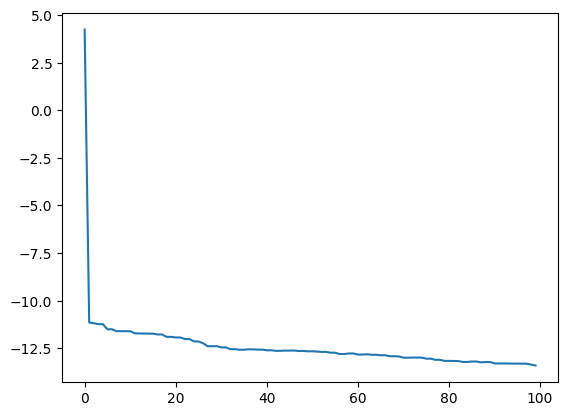

In [29]:

eig = np.linalg.eigvals(cov_matrix_)
plt.plot(np.arange(100), np.log10(eig[:100]))
